# 1. Preparation
## Reading sample data

In [80]:
import pandas as pd

posts = pd.read_parquet('coding_task_ds_2021-09/psoriasis_all_posts.parquet')
treatments = pd.read_excel('coding_task_ds_2021-09/keywords_psoriasis_therapies.xlsx')
# posts.head()
# posts.describe()
# treatments.head()
# treatments.describe()

## Preparing datastructures for tagging treatments mentioned in posts

In [81]:
def copy_and_add_columns(df, columns):
    extended = df.copy()
    for column in columns:
        extended[column] = False
    return extended

treatment_categories = treatments.category.unique()
keywords = dict()
for category in treatment_categories:
    category_keywords = treatments[treatments.category.eq(category)]
    keywords[category] = category_keywords.keyword.unique()
mentions = copy_and_add_columns(posts, treatment_categories)
# treatment_categories
# keywords
# mentions

# 2. Calculation
## Tagging posts with treatment mentions
a post mentions a treatment if at least 1 associated keyword is found in the post text

In [82]:
def contains_any(string, keyword_list):
    return any(keyword in string for keyword in keyword_list)

for index, row in mentions.iterrows():
    for category in treatment_categories:
        mentions.at[index, category] = contains_any(row['text'], keywords[category])
mentions

,post_id,text,user,timestamp,subject_id,forum_id,Andere systemische Therapie,Andere topische Therapie,Badetherapie,Biologicals,Kortison,Kortison (topisch),Lichttherapie,Methotrexat,Naturheilmittel,Sonstige Therapie
96315,170079,zunehmend oft höre ich über die problematik d...,Annamaria,2010-01-01 21:48:37,13338,4-community,False,False,False,False,False,False,False,False,False,False
96316,170082,"Hallo Annamaria, herzlich Willkommen hier im...",Fischi,2010-01-01 21:48:37,13338,4-community,False,False,False,False,False,False,False,False,False,False
96317,170210,"hallo, Annamaria - ich wünsche dir wirklich ...",Bibi,2010-01-01 21:48:37,13338,4-community,False,False,False,False,False,False,False,False,False,False
30501,170251,Auch ich wünsche euch ein schönes und glückli...,BlackLady,2010-01-02 10:13:06,3969,1-allgemeines,False,False,False,False,False,False,False,False,False,False
30498,170019,Ich wünsche Allen Frohes Neues Jahr GB Pics...,Bernd-57,2010-01-02 10:13:06,3969,1-allgemeines,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73863,424715,vor 1 Stunde schrieb Clau dia: Übrigens. I...,Claudia,2021-08-13 12:12:17,10061,4-community,False,False,False,False,False,False,False,False,False,False
73351,443736,Unser Sommertreffen rückt näher. Wer es im Ka...,Claudia,2021-08-15 09:57:56,10000,4-community,False,False,False,False,False,False,False,False,False,False
22658,443739,"Hallo und Euch einen schönen Sonntag, da ich...",BlackFlag,2021-08-15 17:23:17,2911,1-allgemeines,False,False,False,False,False,False,False,False,False,False
22660,443745,"hallo, BlackFlag - ich musste erst einmal im...",Bibi,2021-08-15 17:23:17,2911,1-allgemeines,False,False,False,False,False,False,False,False,False,False


# 3. Visualization
## Treatment mentions - total
% posts that mention a given treatment

<AxesSubplot:>

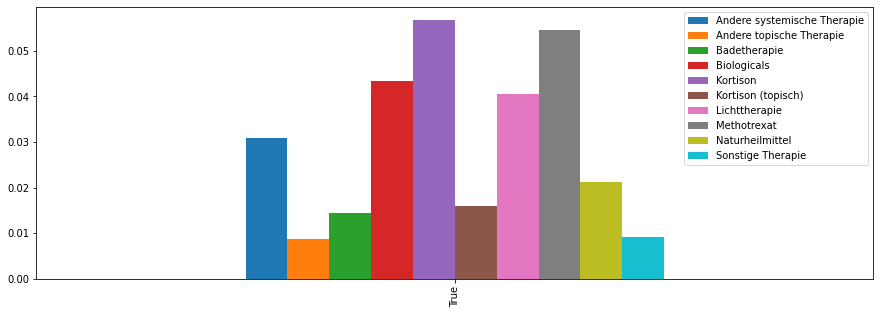

In [83]:
post_columns = posts.columns.unique()

overall_treatment_mentions = mentions\
    .drop(columns=post_columns)\
    .apply(pd.Series.value_counts)\
    .drop(False) / len(posts.index)
overall_treatment_mentions.plot(kind='bar', figsize=(15, 5))

## Treatment mentions over time
% posts that mention a given treatment per month

array([<AxesSubplot:xlabel='year,month'>,
       <AxesSubplot:xlabel='year,month'>,
       <AxesSubplot:xlabel='year,month'>,
       <AxesSubplot:xlabel='year,month'>,
       <AxesSubplot:xlabel='year,month'>,
       <AxesSubplot:xlabel='year,month'>,
       <AxesSubplot:xlabel='year,month'>,
       <AxesSubplot:xlabel='year,month'>,
       <AxesSubplot:xlabel='year,month'>,
       <AxesSubplot:xlabel='year,month'>], dtype=object)

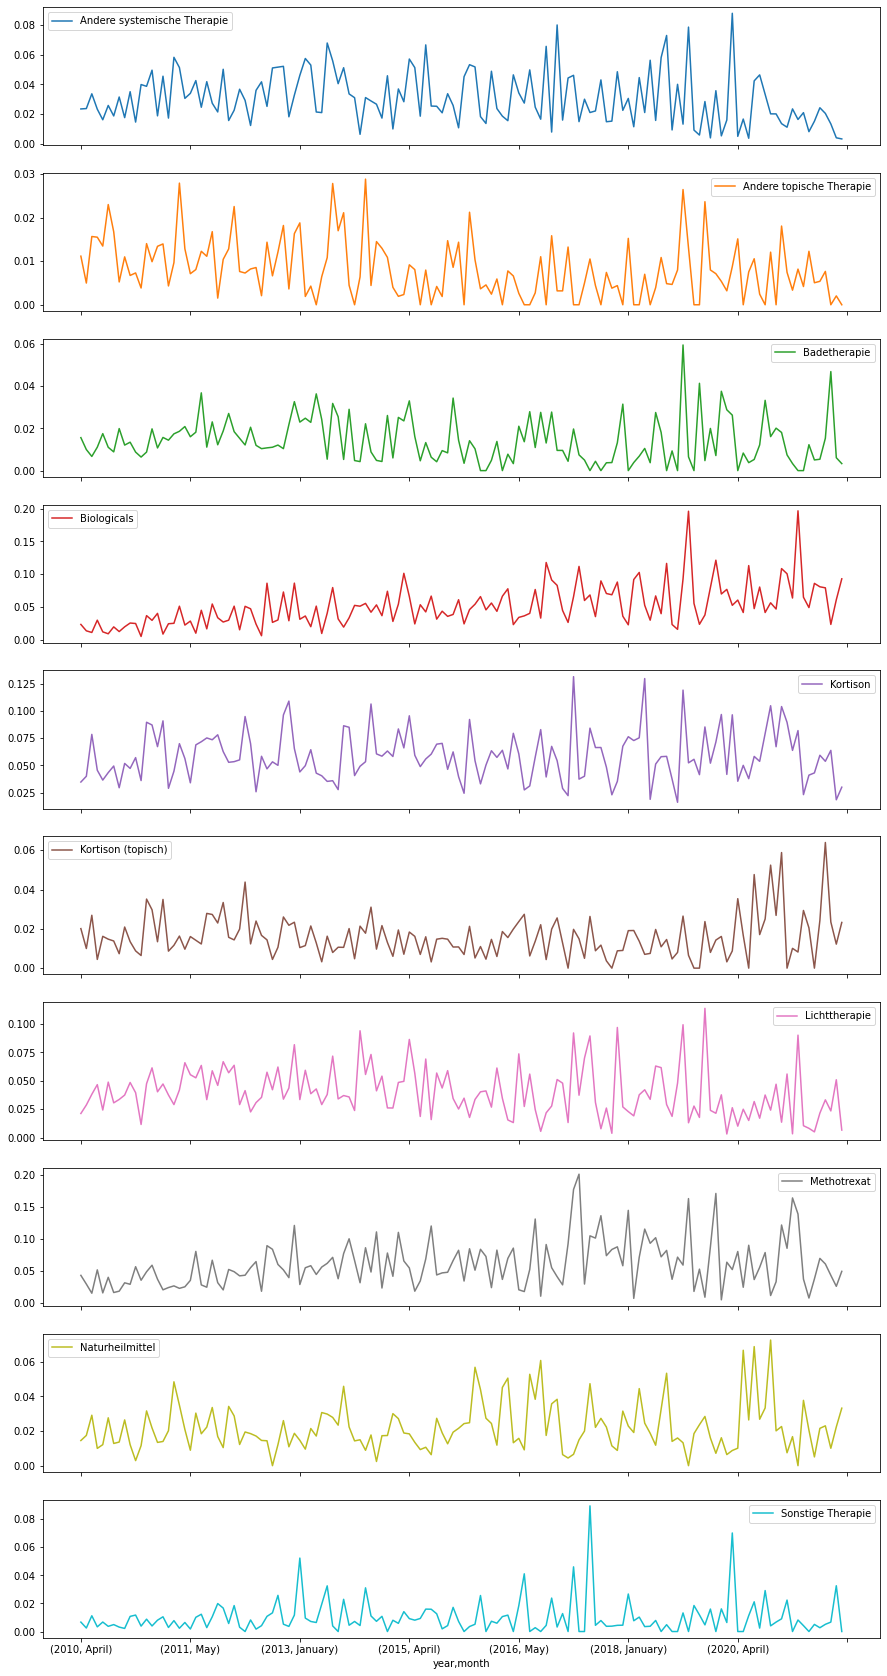

In [84]:
unused_columns = ['post_id', 'subject_id']


total_posts_monthly = mentions['timestamp']\
    .groupby([
        mentions['timestamp'].dt.year.rename('year'),
        mentions['timestamp'].dt.month_name().rename('month')
    ])\
    .count()

mentions_monthly = mentions\
    .drop(columns=unused_columns)\
    .groupby([
        mentions['timestamp'].dt.year.rename('year'),
        mentions['timestamp'].dt.month_name().rename('month')
    ])\
    .sum()\
    .div(total_posts_monthly, axis=0)

mentions_monthly.plot(figsize=(15, 30), subplots=True)